### E-Mail Spam Filter - NLP using Naive Bayes
#### By Steven Secreti

In [1]:
#Import and initalize required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Import dataset
spam_df = pd.read_csv("emails.csv")
print("First 5 emails: ", spam_df.head(5))
print("Last 5 emails: ", spam_df.tail(5))

First 5 emails:                                                  text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
Last 5 emails:                                                     text  spam
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0


In [3]:
#Description of dataset
description = spam_df.describe()
print("Description: ", description)

Description:                spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


In [4]:
#Info on dataset
info = spam_df.info()
print("Info: ", info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
Info:  None


In [5]:
#Visualizing the Dataset
not_spam_df = spam_df[spam_df["spam"] == 0]
is_spam_df = spam_df[spam_df["spam"] == 1]
print("not_spam: ", not_spam_df.head(10))
print("spam: ", is_spam_df.head(10))

not_spam:                                                     text  spam
1368  Subject: hello guys ,  i ' m " bugging you " f...     0
1369  Subject: sacramento weather station  fyi  - - ...     0
1370  Subject: from the enron india newsdesk - jan 1...     0
1371  Subject: re : powerisk 2001 - your invitation ...     0
1372  Subject: re : resco database and customer capt...     0
1373  Subject: ben zhang  any suggestions ?  - g  - ...     0
1374  Subject: manoj gupta - interview schedule  att...     0
1375  Subject: re : hello from vince kaminski at enr...     0
1376  Subject: candlestick charts  fyi fallout  - - ...     0
1377  Subject: faculty information sheet  mr . kamin...     0
spam:                                                  text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Su

In [6]:
spam_percentage = len(is_spam_df) / len(spam_df)
print("Percentage of spam within dataset: {}%".format(round(spam_percentage*100,2)))

Percentage of spam within dataset: 23.88%


In [7]:
not_spam_percentage = len(not_spam_df) / len(spam_df)
print("Percentage of not spam within dataset: {}%".format(round(not_spam_percentage*100,2)))

Percentage of not spam within dataset: 76.12%


<AxesSubplot:xlabel='spam', ylabel='count'>

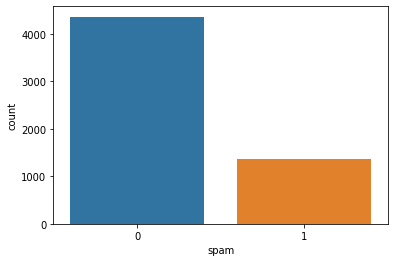

In [8]:
sns.countplot(x=spam_df["spam"])

In [9]:
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ["Hello, how are you?", "Hi, I am fine.", "Thank you, and you?"]
vectorizer = CountVectorizer()

In [10]:
#Example of count vectorizer on sample data
transform_features = vectorizer.fit_transform(sample_data)
print("Transform Features: ", transform_features)
print("Feature Names: ", vectorizer.get_feature_names_out())
print("Features Array: \n", transform_features.toarray())

Transform Features:    (0, 4)	1
  (0, 6)	1
  (0, 2)	1
  (0, 8)	1
  (1, 5)	1
  (1, 0)	1
  (1, 3)	1
  (2, 8)	2
  (2, 7)	1
  (2, 1)	1
Feature Names:  ['am' 'and' 'are' 'fine' 'hello' 'hi' 'how' 'thank' 'you']
Features Array: 
 [[0 0 1 0 1 0 1 0 1]
 [1 0 0 1 0 1 0 0 0]
 [0 1 0 0 0 0 0 1 2]]


In [11]:
vectorizer = CountVectorizer()
spam_count_vectorizer = vectorizer.fit_transform(spam_df["text"])
print(vectorizer.get_feature_names_out())
spam_features_array = spam_count_vectorizer.toarray()
print("Shape: ", spam_features_array.shape)

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']
Shape:  (5728, 37303)


In [12]:
#Training the Model (Example)
from sklearn.naive_bayes import MultinomialNB

label = spam_df["spam"].values

nb_classifier = MultinomialNB()
nb_classifier.fit(spam_features_array, label)

MultinomialNB()

In [13]:
#Creating testing samples and transforming them into feature vecs
testing_sample = ["Free Money!!!", "Hi Boss, please let me know when the next meeting is."]
testing_sample_vectorizer = vectorizer.transform(testing_sample)

In [14]:
test_result = nb_classifier.predict(testing_sample_vectorizer)
test_result_readable = ["Spam" if x == 1 else "Not Spam" for x in test_result]
print("Test Result: ", test_result_readable)

Test Result:  ['Spam', 'Not Spam']


In [15]:
#Training the Model (Legitamite)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(spam_features_array, label, test_size=0.2, random_state=42)

In [16]:
#Create classifier, where x is data features and y is class labels
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

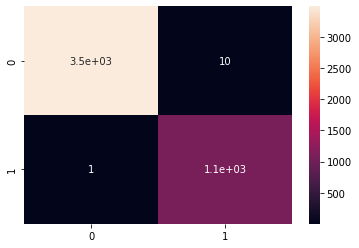

In [18]:
#Testing Parameters Accuracy on Training Data
y_pred_train = nb_classifier.predict(x_train)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

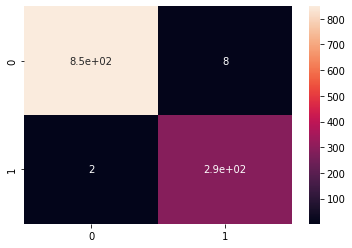

In [19]:
#Testing Predictive Accuracy on Test Data
y_pred_test = nb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [20]:
class_report = classification_report(y_test, y_pred_test)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [21]:
#Increase Accuracy by cleaning data
import nltk
porter = nltk.PorterStemmer()
stop_words = nltk.corpus.stopwords.words("english")

text_tokenized = [nltk.word_tokenize(email) for email in spam_df["text"]]
text_normalized_stemmed = [' '.join([''.join(porter.stem(word.lower())) for word in email if word.isalpha() and (word.lower() not in stop_words)]) for email in text_tokenized]
text_normalized_regular = [' '.join([word.lower() for word in email if word.isalpha() and (word.lower() not in stop_words)]) for email in text_tokenized]
print("Text Normalized Stemmed: ", text_normalized_stemmed[:2])
print("Text Normalized Regular: ", text_normalized_regular[:2])

Text Normalized Stemmed:  ['subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest', 'subject stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterwa

In [22]:
import copy
spam_df_normalized_stemmed = copy.deepcopy(spam_df)
spam_df_normalized_stemmed = spam_df_normalized_stemmed.replace({"text": text_normalized_stemmed})

spam_df_normalized_regular = copy.deepcopy(spam_df)
spam_df_normalized_regular = spam_df_normalized_regular.replace({"text": text_normalized_regular})

print("spam_df_normalized_stemmed: \n", spam_df_normalized_stemmed.head(2))

spam_df_normalized_stemmed: 
                                                 text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1


In [23]:
labels = spam_df["spam"]

spam_stemmed_vectorizer = CountVectorizer()
spam_stemmed_features = spam_stemmed_vectorizer.fit_transform(spam_df_normalized_stemmed["text"])
spam_stemmed_features_array = spam_stemmed_features.toarray()

spam_normalized_vectorizer = CountVectorizer()
spam_normalized_features = spam_normalized_vectorizer.fit_transform(spam_df_normalized_regular["text"])
spam_normalized_features_array = spam_normalized_features.toarray()

In [24]:
stemmed_train, stemmed_test, stemmed_labels_train, stemmed_labels_test = train_test_split(spam_stemmed_features_array, labels, test_size=0.2, random_state=42)
normalized_train, normalized_test, normalized_labels_train, normalized_labels_test = train_test_split(spam_normalized_features_array, labels, test_size=0.2, random_state=42)

stemmed_nb_classifier = MultinomialNB()
stemmed_nb_classifier.fit(stemmed_train, stemmed_labels_train)

normalized_nb_classifier = MultinomialNB()
normalized_nb_classifier.fit(normalized_train, normalized_labels_train)

MultinomialNB()

In [25]:
stemmed_y_pred_test = stemmed_nb_classifier.predict(stemmed_test)
normalized_y_pred_test = normalized_nb_classifier.predict(normalized_test)

stemmed_cm = confusion_matrix(stemmed_labels_test, stemmed_y_pred_test)
normalized_cm = confusion_matrix(normalized_labels_test, normalized_y_pred_test)

<AxesSubplot:>

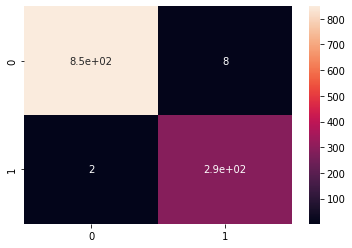

In [26]:
sns.heatmap(stemmed_cm, annot=True)

<AxesSubplot:>

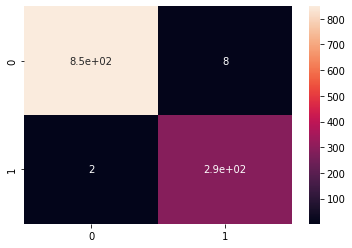

In [27]:
sns.heatmap(normalized_cm, annot=True)

In [28]:
stemmed_report = classification_report(stemmed_labels_test, stemmed_y_pred_test)
normalized_report = classification_report(normalized_labels_test, normalized_y_pred_test)

In [30]:
print("Original Report: \n", class_report)
print("Stemmed Report: \n", stemmed_report)
print("Normalized Report: \n", normalized_report)

Original Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

Stemmed Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

Normalized Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg    